<a href="https://colab.research.google.com/github/2303a510g5/AIML-2025_B15/blob/main/lab%20exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=3: {accuracy}")

Accuracy with k=3: 1.0


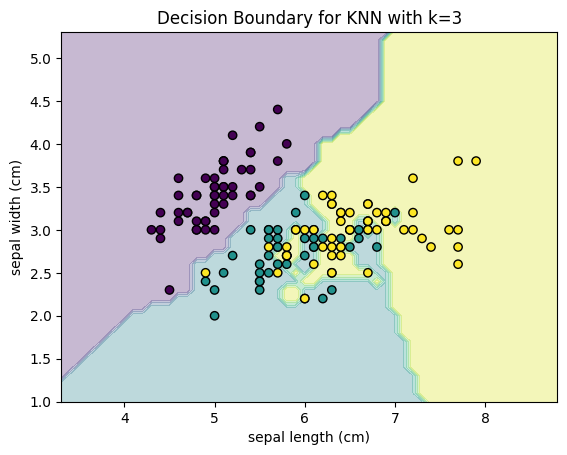

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Select two features for visualization
X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train KNN with k=3 on the selected features
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on mesh grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision Boundary for KNN with k=3")
plt.show()

In [3]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [4]:
from sklearn.preprocessing import StandardScaler

# Without feature scaling
knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)
accuracy_no_scaling = accuracy_score(y_test, knn_no_scaling.predict(X_test))

# With feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))

print(f"Accuracy without scaling: {accuracy_no_scaling}")
print(f"Accuracy with scaling: {accuracy_scaled}")

Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [5]:
# Initialize KNN with k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)
accuracy_k5 = accuracy_score(y_test, knn_k5.predict(X_test))
print(f"Accuracy with k=5: {accuracy_k5}")

Accuracy with k=5: 1.0


Accuracy without scaling: 0.9533333333333334


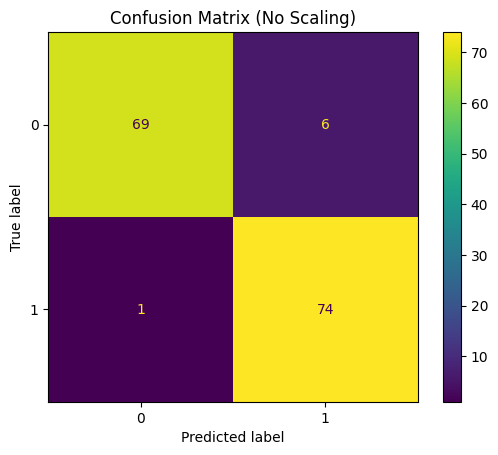

Accuracy with scaling: 0.9533333333333334


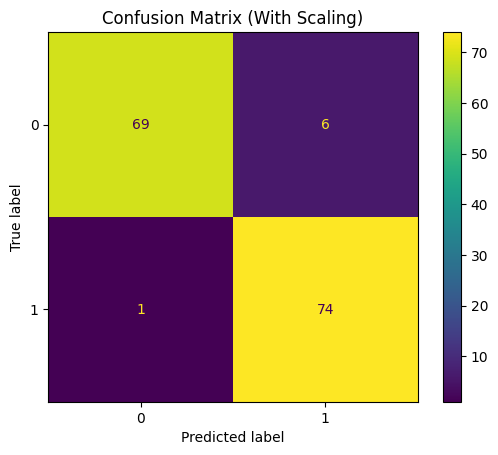

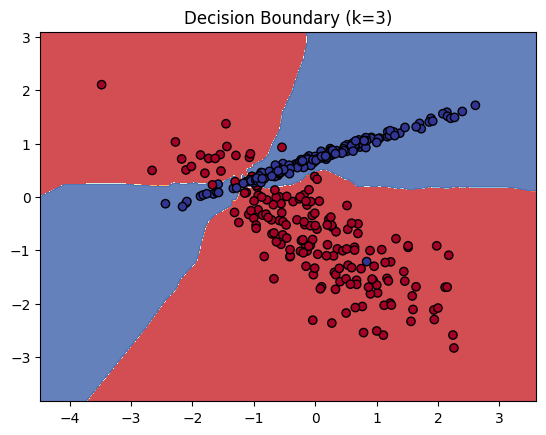

Accuracy with k=5 (scaling): 0.9466666666666667


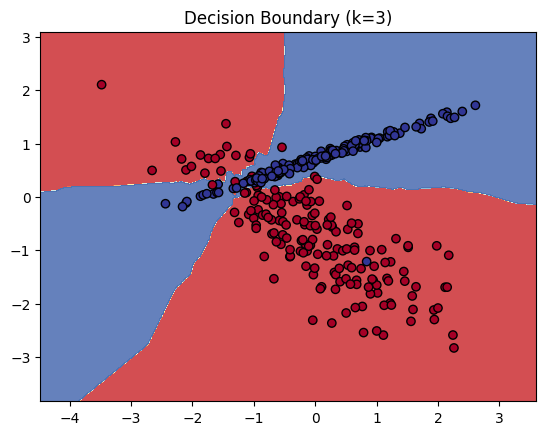

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)

accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)

print("Accuracy without scaling:", accuracy_no_scaling)
ConfusionMatrixDisplay(conf_matrix_no_scaling).plot()
plt.title("Confusion Matrix (No Scaling)")
plt.show()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)

accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
conf_matrix_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)

print("Accuracy with scaling:", accuracy_with_scaling)
ConfusionMatrixDisplay(conf_matrix_with_scaling).plot()
plt.title("Confusion Matrix (With Scaling)")
plt.show()

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary (k=3)")
    plt.show()

plot_decision_boundary(knn_with_scaling, X_train_scaled, y_train)

knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)
y_pred_k5 = knn_k5.predict(X_test_scaled)

accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print("Accuracy with k=5 (scaling):", accuracy_k5)

plot_decision_boundary(knn_k5, X_train_scaled, y_train)

Accuracy without scaling: 0.9555555555555556


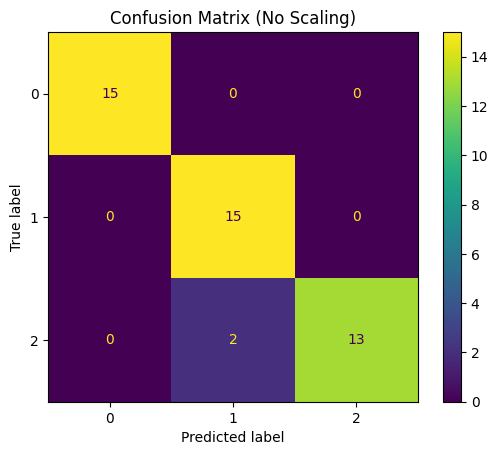

Accuracy with scaling: 0.9111111111111111


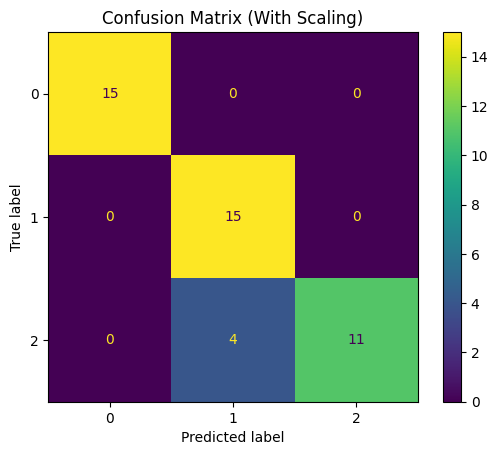

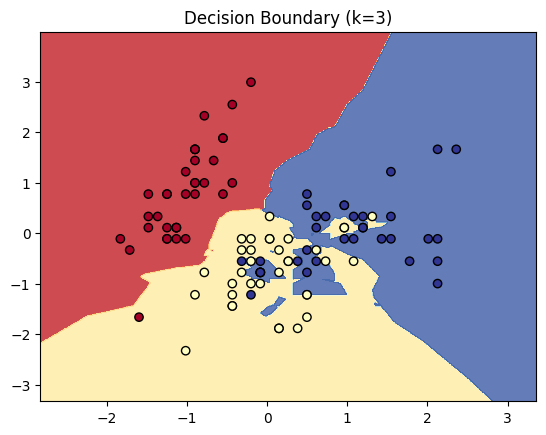

Accuracy with k=5 (scaling): 0.9111111111111111


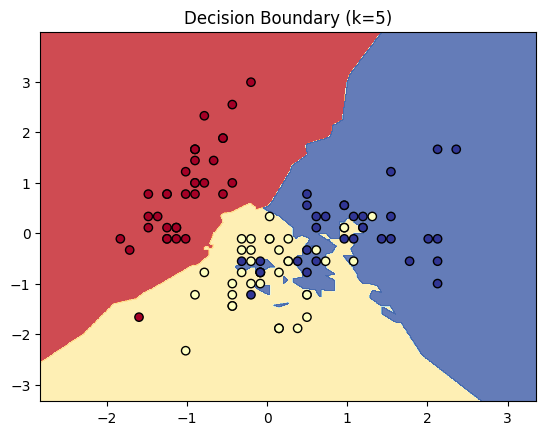

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, header=None, names=columns)
data['class'] = data['class'].astype('category').cat.codes

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)

accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)

print("Accuracy without scaling:", accuracy_no_scaling)
ConfusionMatrixDisplay(conf_matrix_no_scaling, display_labels=np.unique(y)).plot()
plt.title("Confusion Matrix (No Scaling)")
plt.show()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)

accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
conf_matrix_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)

print("Accuracy with scaling:", accuracy_with_scaling)
ConfusionMatrixDisplay(conf_matrix_with_scaling, display_labels=np.unique(y)).plot()
plt.title("Confusion Matrix (With Scaling)")
plt.show()

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

knn_with_scaling_2d = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling_2d.fit(X_train_scaled[:, :2], y_train)
plot_decision_boundary(knn_with_scaling_2d, X_train_scaled[:, :2], y_train, "Decision Boundary (k=3)")

knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)
y_pred_k5 = knn_k5.predict(X_test_scaled)

accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print("Accuracy with k=5 (scaling):", accuracy_k5)

knn_k5_2d = KNeighborsClassifier(n_neighbors=5)
knn_k5_2d.fit(X_train_scaled[:, :2], y_train)
plot_decision_boundary(knn_k5_2d, X_train_scaled[:, :2], y_train, "Decision Boundary (k=5)")

Accuracy: 0.96
Confusion Matrix:
[[76  2]
 [ 4 68]]


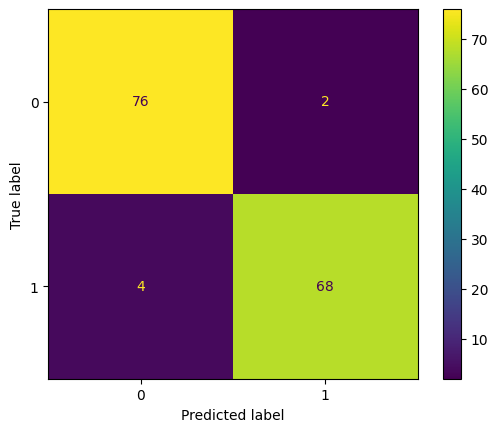

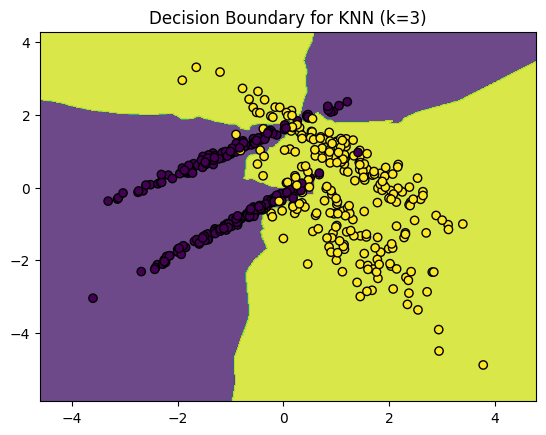

Accuracy with feature scaling: 0.9533333333333334
Accuracy with k=5: 0.9533333333333334


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Create a classification dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Apply KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 4. Evaluate accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 5. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

# 6. Visualize the decision boundary
def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

fig, ax = plt.subplots()
plot_decision_boundary(X, y, knn, ax, "Decision Boundary for KNN (k=3)")
plt.show()

# 7. Compare KNN with and without feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with feature scaling: {accuracy_scaled}")

# 8. Tune the value of k (test with k=5)
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)
y_pred_k5 = knn_k5.predict(X_test)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Accuracy with k=5: {accuracy_k5}")